In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def data_scrape(year):
    # Define the URL that's going to be used to search for the data.
    url = "https://www.pro-football-reference.com/years/" + \
        str(year)+"/rushing.htm"
    # Set the reading for the table found in the site established before.
    html = pd.read_html(url, header=1)
    rushing_df = html[0]
    clean_data = rushing_df.drop(rushing_df[rushing_df.Age == 'Age'].index)
    clean_data = clean_data.fillna(0)
    rushing_players = clean_data.drop(['Rk'], axis=1)
    rushing_players[["Age", "G", "GS", "Att", "Yds", "TD", "1D", "Lng", "Y/A", "Y/G", "Fmb"]] = rushing_players[[
        "Age", "G", "GS", "Att", "Yds", "TD", "1D", "Lng", "Y/A", "Y/G", "Fmb"]].apply(pd.to_numeric)
    return rushing_players


In [5]:
def league_avg(player_df):
    temp_df = pd.DataFrame(columns=player_df.columns)
    temp_series = player_df.mean()

    temp_df = temp_df.append(temp_series, ignore_index=True)
    temp_df.drop(labels=["Player", "Tm", "Pos"], inplace=True, axis=1)
    return temp_df


In [9]:
def team_avg(player_df, team):
    temp_df = pd.DataFrame(columns=player_df.columns)

    temp_tm_df = pd.DataFrame(columns=player_df.columns)
    temp_tm_df = player_df.loc[player_df['Tm'] == team]
    temp_series = temp_tm_df.mean()

    temp_df = temp_df.append(temp_series, ignore_index=True)
    temp_df.drop(labels=["Player", "Tm", "Pos"], inplace=True, axis=1)

    return temp_df


In [14]:
def player_info(player_df, player_name):
    temp_df = pd.DataFrame(columns=player_df.columns)

    temp_tm_df = pd.DataFrame(columns=player_df.columns)
    temp_tm_df = player_df.loc[player_df['Player'] == player_name]

    temp_df = temp_df.append(temp_tm_df, ignore_index=True)

    temp_df.drop(labels=["Player", "Tm", "Pos"], inplace=True, axis=1)

    return temp_df


In [4]:
player_stats = data_scrape(2022)
player_stats

,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,Derrick Henry,TEN,28,RB,13,13,275,1199,11,52,56,4.4,92.2,4
1,Josh Jacobs,LVR,24,RB,13,13,269,1402,11,77,86,5.2,107.8,2
2,Saquon Barkley,NYG,25,RB,13,13,251,1083,8,47,68,4.3,83.3,1
3,Nick Chubb,CLE,27,RB,13,13,231,1153,12,51,41,5.0,88.7,1
4,Dameon Pierce,HOU,22,RB,13,13,220,939,4,54,75,4.3,72.2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Courtland Sutton,DEN,27,WR,12,12,1,5,0,0,5,5.0,0.4,0
330,Patrick Taylor,GNB,24,RB,10,0,1,6,0,1,6,6.0,0.6,0
331,Marquez Valdes-Scantling,KAN,28,WR,13,8,1,-3,0,0,-3,-3.0,-0.2,0
332,Quez Watkins,PHI,24,WR,13,6,1,-3,0,0,-3,-3.0,-0.2,1


In [7]:
league_avg_df = league_avg(player_stats)
league_avg_df

/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_78379/3788075141.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_series = player_df.mean()
/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_78379/3788075141.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(temp_series, ignore_index=True)


,Age,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,26.12037,9.657407,4.82716,34.632716,154.79321,1.194444,8.716049,18.212963,4.099691,15.167593,1.225309


In [10]:
team_avg_df = team_avg(player_stats, "SFO")
team_avg_df

/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_78379/1993005409.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp_series = temp_tm_df.mean()
/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_78379/1993005409.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(temp_series, ignore_index=True)


,Age,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,26.416667,7.75,4.083333,16.583333,67.0,0.666667,4.666667,14.166667,3.391667,12.333333,0.833333


In [21]:
player_name = "Jimmy Garoppolo"
ind_player_info = player_info(player_stats, player_name=player_name)
ind_player_info

/var/folders/6b/ddjkk4l908n5cwpnvhllb3fc0000gn/T/ipykernel_78379/2805831189.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(temp_tm_df, ignore_index=True)


,Age,G,GS,Att,Yds,TD,1D,Lng,Y/A,Y/G,Fmb
0,31,11,10,23,33,2,12,6,1.4,3.0,3


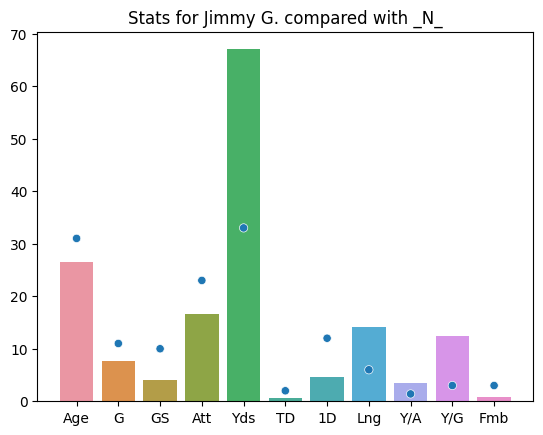

In [36]:
plt.figure()
team_data = sns.barplot(data=team_avg_df).set(title="Stats for Jimmy G. compared with _N_")

player_data = sns.scatterplot(
    data=ind_player_info.transpose()
)

player_data.legend_.remove()

plt.show()